<h4>Regression Dataset - Linear Regression vs XGBoost</h4>

Training on SageMaker takes several minutes (even for simple dataset)

Compare XGBoost and Linear Regression for simple regression dataset

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost

     |████████████████████████████████| 173.6 MB 12 kB/s              


In [40]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


# XGBoost 
import xgboost as xgb
# Linear Regression
from sklearn.linear_model import LinearRegression

In [41]:
# All data
df = pd.read_csv('./data/linear_all.csv')

In [42]:
df.head()

,x,y
0,0,21.412275
1,1,21.691298
2,2,57.307712
3,3,38.479079
4,4,50.096098


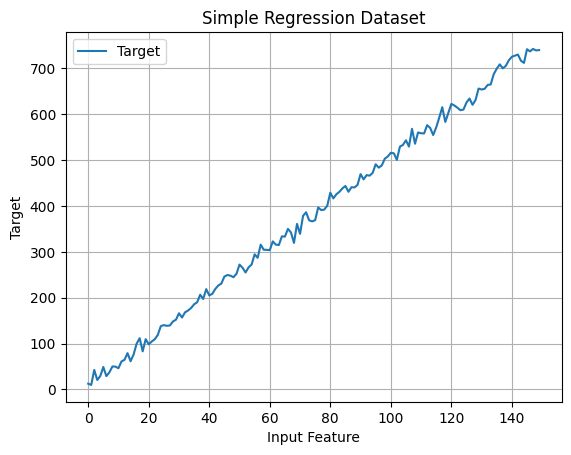

In [4]:
plt.plot(df.x,df.y,label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Simple Regression Dataset')
plt.show()

In [43]:
# Let's load Training and Validation Datasets
train_file = './data/linear_train.csv'
validation_file = './data/linear_validation.csv'

# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=['y','x'])
df_validation = pd.read_csv(validation_file,names=['y','x'])

In [44]:
df_train.head()

,y,x
0,680.457270,82
1,1098.275162,134
2,905.643782,114
3,354.007382,42
4,896.269533,109


In [45]:
df_validation.head()

,y,x
0,552.264067,67
1,102.951235,11
2,510.592889,62
3,1120.097979,137
4,868.676139,108


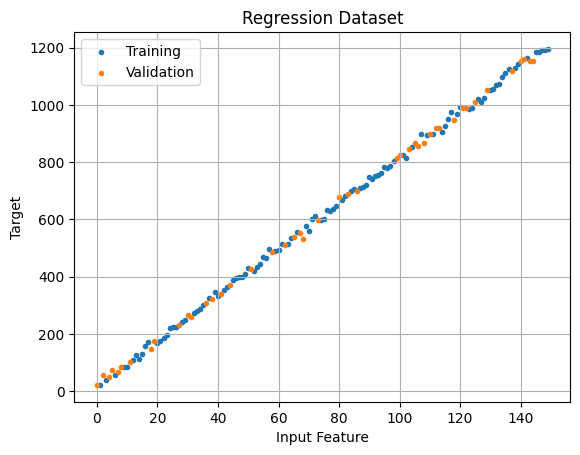

In [46]:
# Create scatter plot for training data
# df_train.x: x-coordinates of training data points
# df_train.y: y-coordinates of training data points
# label='Training': identifies these points in the legend
# marker='.': uses dots for the scatter points
plt.scatter(df_train.x, df_train.y, label='Training', marker='.')

# Create scatter plot for validation data
# df_validation.x: x-coordinates of validation data points
# df_validation.y: y-coordinates of validation data points
# label='Validation': identifies these points in the legend
# marker='.': uses dots for the scatter points
plt.scatter(df_validation.x, df_validation.y, label='Validation', marker='.')

plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Regression Dataset')
plt.legend()
plt.show()

In [47]:
# Create training features (X_train)
# df_train.iloc[:,1:] selects all rows and columns starting from index 1 onwards
# This excludes the first column (index 0) which is the target variable
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 

# Create training target variable (y_train)
# df_train.iloc[:,0] selects all rows but only the first column (index 0)
# .ravel() converts the result to a 1D array, which is required by many ML algorithms
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

# Create validation features (X_validation)
# Similar to X_train, but using validation data
# Selects all columns except the first one
X_validation = df_validation.iloc[:,1:]

# Create validation target variable (y_validation)
# Similar to y_train, but using validation data
# Selects only the first column and converts to 1D array
y_validation = df_validation.iloc[:,0].ravel()

In [48]:
# Create an instance of XGBoost Regressor
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor()

In [49]:
# Default Options
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
# Train the XGBoost regression model
regressor.fit(
    # Main training data:
    X_train,    # Training features
    y_train,    # Training target values

    # eval_set specifies datasets to evaluate during training
    # It's a list of (X,y) pairs
    eval_set = [
        (X_train, y_train),        # First pair: training data
        (X_validation, y_validation)  # Second pair: validation data
    ]
    # This allows XGBoost to:
    # 1. Report error metrics on both datasets during training
    # 2. Monitor for overfitting by comparing training vs validation performance
    # 3. Can be used for early stopping if validation performance starts to degrade
)

[0]	validation_0-rmse:243.77266	validation_1-rmse:270.82872
[1]	validation_0-rmse:177.19206	validation_1-rmse:199.79438
[2]	validation_0-rmse:129.21222	validation_1-rmse:149.33198
[3]	validation_0-rmse:94.49295	validation_1-rmse:110.88420
[4]	validation_0-rmse:69.54803	validation_1-rmse:83.10288
[5]	validation_0-rmse:51.49743	validation_1-rmse:61.93742
[6]	validation_0-rmse:38.39195	validation_1-rmse:46.98676
[7]	validation_0-rmse:28.90191	validation_1-rmse:36.20270
[8]	validation_0-rmse:22.01453	validation_1-rmse:29.68529
[9]	validation_0-rmse:16.95632	validation_1-rmse:24.53876
[10]	validation_0-rmse:13.30109	validation_1-rmse:21.15972
[11]	validation_0-rmse:10.69628	validation_1-rmse:19.07742
[12]	validation_0-rmse:8.63026	validation_1-rmse:17.67072
[13]	validation_0-rmse:7.14759	validation_1-rmse:16.98714
[14]	validation_0-rmse:6.00471	validation_1-rmse:16.56992
[15]	validation_0-rmse:5.16202	validation_1-rmse:16.44020
[16]	validation_0-rmse:4.52356	validation_1-rmse:16.44165
[17]	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
# Get the Training RMSE and Evaluation RMSE
eval_result = regressor.evals_result()

In [52]:
eval_result

{'validation_0': OrderedDict([('rmse',
               [243.7726610409411,
                177.1920632205752,
                129.21222192286803,
                94.49295494325287,
                69.54802771431268,
                51.49742822553229,
                38.391951525066226,
                28.901907819357227,
                22.01452725463734,
                16.95632007659739,
                13.301089323134542,
                10.69627591400845,
                8.630264100566794,
                7.147589897342684,
                6.004714310150995,
                5.162019653407276,
                4.523560065966206,
                4.054558260572597,
                3.7121074600993924,
                3.477649952968532,
                3.275610955952703,
                3.122189360129871,
                2.9950901709032154,
                2.8918109389431956,
                2.8132634905645406,
                2.7148367164288087,
                2.6745667449852157,
      

In [53]:
# Create a range of numbers representing each training round/iteration
# len(eval_result['validation_0']['rmse']) gets the total number of training rounds
# eval_result contains metrics for each training iteration
# 'validation_0' refers to the first dataset in eval_set (training data)
# 'rmse' is the Root Mean Square Error metric
# range() creates a sequence from 0 to the number of training rounds
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [54]:
print(training_rounds)

range(0, 100)


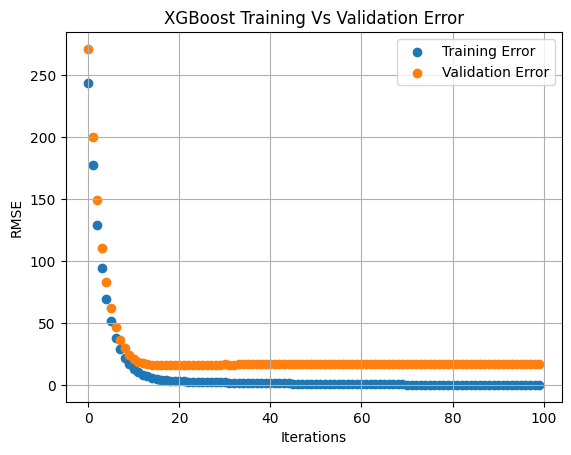

In [55]:
# Create scatter plot for Training Error
# x=training_rounds: x-axis shows the iteration numbers
# y=eval_result['validation_0']['rmse']: y-axis shows RMSE for training data
# 'validation_0' refers to the first dataset in eval_set (training data)
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')

# Create scatter plot for Validation Error
# x=training_rounds: x-axis shows the iteration numbers
# y=eval_result['validation_1']['rmse']: y-axis shows RMSE for validation data
# 'validation_1' refers to the second dataset in eval_set (validation data)
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('XGBoost Training Vs Validation Error')
plt.legend()
plt.show()

# Initial Rapid Improvement (Steep Drop):

# First 5-8 iterations show dramatic error reduction
# Model is learning the main patterns in the data quickly
# Biggest gains in performance happen early
# Plateau After 5-8 Iterations:

# Error reduction slows significantly
# Additional iterations provide minimal improvement
# Model has learned most of the important patterns
# Both Lines Following Similar Patterns:

# Training and validation errors decrease similarly
# Indicates good generalization (no overfitting)
# Model performs similarly on seen and unseen data
# Implications:

# You might only need 8-10 iterations for optimal performance
# More iterations might not be worth the computational cost
# Good candidate for early stopping around iteration 8
# This is typical of a well-behaved learning process where the model quickly finds the main patterns in your data.

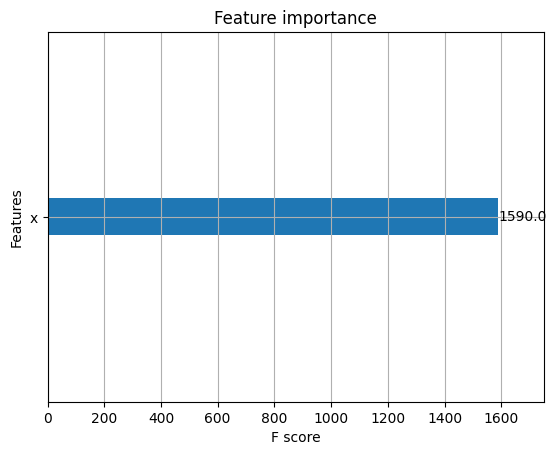

In [56]:
xgb.plot_importance(regressor)
plt.show()

# Interpretation:

# Single Bar:

# You only have one input feature (the x variable)
# In your simple regression problem, this is expected
# F-score of 1590:

# Measures how useful the feature is in making predictions
# Higher score = more important feature
# Absolute value (1590) by itself isn't as meaningful as relative comparisons
# In your case, since it's the only feature, it shows 100% of the importance

## Validation Dataset Compare Actual and Predicted

In [57]:
result = regressor.predict(X_validation)

In [58]:
result[:5]

array([ 556.9637 ,   85.16265,  514.78613, 1125.5228 ,  898.17456],
      dtype=float32)

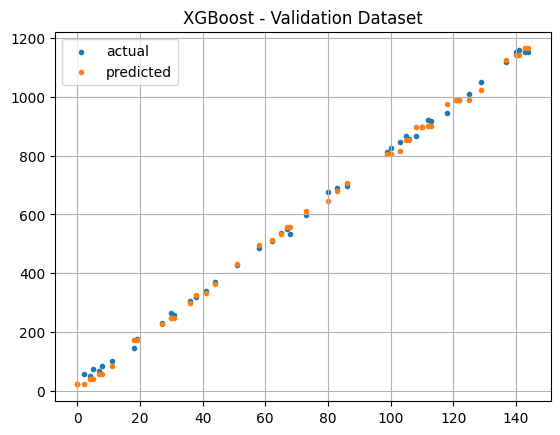

In [59]:
plt.title('XGBoost - Validation Dataset')

# Create scatter plot for actual values
# x: validation dataset input features (df_validation.x)
# y: actual target values (df_validation.y)
# label='actual': will show in legend
# marker='.': uses dots for data points
plt.scatter(df_validation.x,df_validation.y,label='actual',marker='.')

# Create scatter plot for predicted values
# x: same validation dataset input features
# y: model's predictions (result)
# label='predicted': will show in legend
# marker='.': uses dots for data points
plt.scatter(df_validation.x,result,label='predicted',marker='.')
plt.grid(True)
plt.legend()
plt.show()

In [63]:
# RMSE Metrics
print('XGBoost Algorithm Metrics')

# Calculate Mean Squared Error (MSE)
# mean_squared_error compares actual values (df_validation.y) with predicted values (result)
# MSE = average of squared differences between actual and predicted values
mse = mean_squared_error(df_validation.y,result)


print(" Mean Squared Error: {0:.2f}".format(mse))
#print(" Root Mean Square Error: {0:.2f}".format(mse**.5))
print(" Root Mean Square Error: {0:.2f}".format(np.sqrt(mse)))

# MSE: Average of squared prediction errors

# Larger errors are penalized more (due to squaring)
# Always positive
# Lower is better
# RMSE: Square root of MSE

# More interpretable as it's in same units as target variable
# Common metric for regression problems
# Lower is better


## Example output
# XGBoost Algorithm Metrics
#  Mean Squared Error: 288.02
#  Root Mean Square Error: 16.97
# Interpretation:

# MSE = 288.02

# This is the average of squared errors
# Large number because errors are squared
# Not very intuitive to interpret directly
# RMSE = 16.97

# This means on average, your predictions are off by about 17 units
# More meaningful because it's in the same units as your target variable
# Can be interpreted as: "typically, the model's predictions deviate from the actual values by about 17 units"
# To determine if these are good results, you need to consider:

# The scale of your target variable
# The acceptable margin of error for your problem
# How this compares to other models or benchmarks
# The business/practical implications of being off by 17 units


XGBoost Algorithm Metrics
 Mean Squared Error: 288.02
 Root Mean Square Error: 16.97


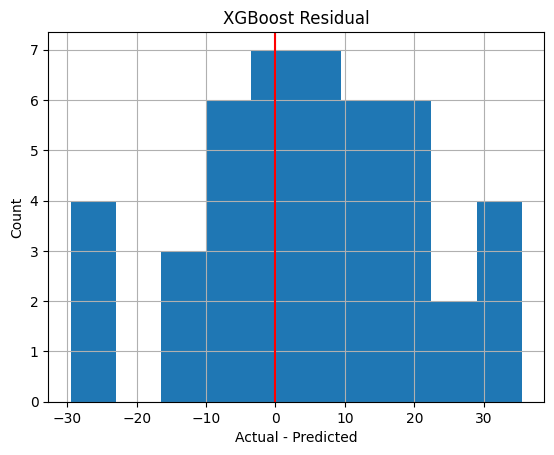

In [ ]:
# Residual
# Over prediction and Under Prediction needs to be balanced

# Calculate residuals (difference between actual and predicted values)
# residuals = actual values (df_validation.y) - predicted values (result)
# Positive residuals mean model underpredicted
# Negative residuals mean model overpredicted
residuals = df_validation.y - result
plt.hist(residuals) # Create histogram of residuals
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('XGBoost Residuals')
# Add vertical line at x=0
# Helps visualize if residuals are balanced around zero
# Red line (color='r') at zero marks perfect predictions
plt.axvline(color='r')
plt.show()

In [66]:
# Count positive and negative residuals
# (residuals > 0) creates a boolean series (True for positive residuals)
# value_counts() counts how many True and False values
# sort=False keeps original order (True/False)
value_counts = (residuals > 0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True])) # 28 cases
print(' Over  Estimation: {0}'.format(value_counts[False])) # 17 cases

# Interpretation of your results:

# Under Estimation (28 cases):

# Positive residuals (actual - predicted > 0)
# Model predicted values lower than actual
# Model underestimated 28 times
# Over Estimation (17 cases):

# Negative residuals (actual - predicted < 0)
# Model predicted values higher than actual
# Model overestimated 17 times
# This shows some bias toward underestimation:

# Model tends to predict lower values more often
# Not perfectly balanced (28 vs 17)
# Ideally, these numbers would be more similar
# Might indicate systematic bias in predictions

 Under Estimation: 28
 Over  Estimation: 17


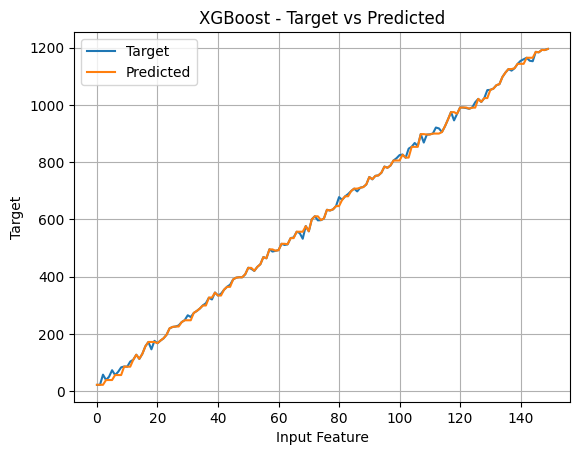

In [69]:
# Create line plot for actual target values
# df.x: x-axis values (input feature)
# df.y: y-axis values (actual target values)
# label='Target': for legend
plt.plot(df.x,df.y,label='Target')

# Create line plot for predicted values
# df.x: same x-axis values
# regressor.predict(df[['x']]): model's predictions for entire dataset
# Note: df[['x']] keeps x as DataFrame format required by model
# label='Predicted': for legend
plt.plot(df.x,regressor.predict(df[['x']]), label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('XGBoost - Target vs Predicted')
plt.show()

## Linear Regression Algorithm 

In [70]:
lin_regressor = LinearRegression()

In [71]:
lin_regressor.fit(X_train, y_train)

LinearRegression()

Compare Weights assigned by Linear Regression.

Original Function: 8*x + 17 + some noise


In [72]:
lin_regressor.coef_

array([7.99777227])

In [73]:
lin_regressor.intercept_

17.68396538850334

Original Function:
y = 8*x + 17 + noise

Linear Regression Found:
y = 7.99777227*x + 17.68396539

Comparing components:
1. Slope (coefficient):
   - Original: 8
   - Found: 7.99777227
   - Very close! (99.97% accurate)

2. Intercept:
   - Original: 17
   - Found: 17.68396539
   - Close! (within ~4% of true value)

In [74]:
result = lin_regressor.predict(df_validation[['x']])

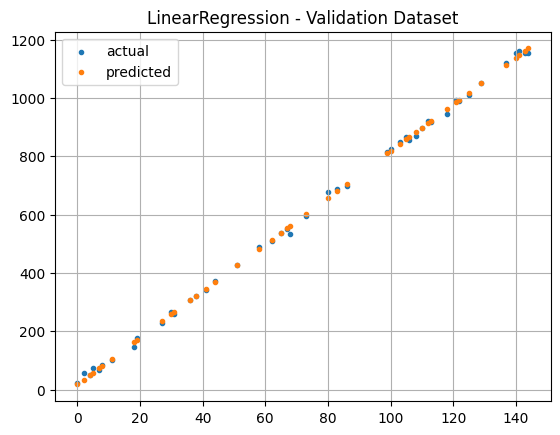

In [75]:
plt.title('LinearRegression - Validation Dataset')

# Create scatter plot for actual values
# x: validation set input features (df_validation.x)
# y: actual target values (df_validation.y)
# label='actual': for legend identification
# marker='.': use dots for data points
plt.scatter(df_validation.x, df_validation.y, label='actual', marker='.')

# Create scatter plot for predicted values
# x: same validation set input features
# y: model's predictions (result)
# label='predicted': for legend identification
# marker='.': use dots for data points
plt.scatter(df_validation.x, result, label='predicted', marker='.')
plt.grid(True)
plt.legend()
plt.show()

In [76]:
# RMSE Metrics
print('Linear Regression Metrics')
mse = mean_squared_error(df_validation.y, result)
print(" Mean Squared Error: {0:.2f}".format(mse))
print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

Linear Regression Metrics
 Mean Squared Error: 99.10
 Root Mean Square Error: 9.95


## Model Performance Comparison

### XGBoost Results
- Mean Squared Error: **288.02**
- Root Mean Square Error: **16.97**

### Linear Regression Results
- Mean Squared Error: **99.10**
- Root Mean Square Error: **9.95**

### Key Findings
- Linear Regression performed better (41% lower error)
- Makes sense as data is truly linear (y = 8x + 17 + noise)
- Simpler model was more effective for this linear relationship
- Shows complex models aren't always better

---
*Note: Lower MSE and RMSE values indicate better model performance*

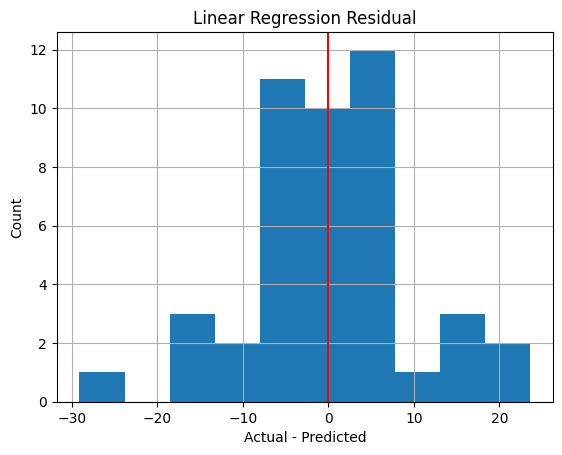

In [77]:
# Calculate residuals (errors)
# residuals = actual values - predicted values
# Positive residuals mean model underpredicted (predicted too low)
# Negative residuals mean model overpredicted (predicted too high)
residuals = df_validation.y - result
plt.hist(residuals) # Shows distribution of prediction errors
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Linear Regression Residual')
plt.axvline(color='r')
plt.show()

In [78]:
# Count number of values greater than zero and less than zero
value_counts = (residuals > 0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Over  Estimation: {0}'.format(value_counts[False]))

 Under Estimation: 24
 Over  Estimation: 21


## Residual Analysis - Model Prediction Balance

### Linear Regression Results
- Under Estimation: **24** cases
- Over Estimation: **21** cases
- Difference: **3** cases

### Comparison with XGBoost
| Metric | XGBoost | Linear Regression |
|--------|---------|-------------------|
| Under Estimation | 28 | 24 |
| Over Estimation | 17 | 21 |
| Difference | 11 | 3 |

### Key Findings
- Linear Regression shows more balanced predictions
  - Nearly equal split between over and under estimation
  - Difference of only 3 cases
  - No strong systematic bias

- XGBoost shows more imbalance
  - Stronger tendency to underpredict
  - Difference of 11 cases
  - Shows more systematic bias

### Conclusion
Linear Regression demonstrates better balanced predictions, further supporting it as the more appropriate model for this linear data.

---
*Note: Smaller difference between over/under estimation indicates better model balance*

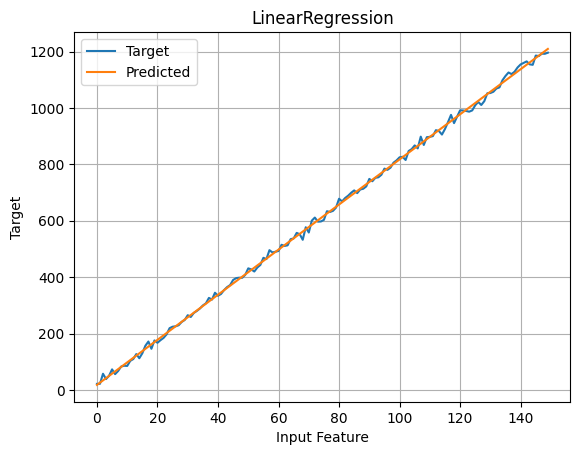

In [ ]:
# Create line plot for actual values (entire dataset)
# df.x: x-axis values (input feature)
# df.y: y-axis values (actual target values)
# label='Target': for legend identification
plt.plot(df.x,df.y, label='Target')

# Create line plot for predicted values
# df.x: same x-axis values
# lin_regressor.predict(df[['x']]): model's predictions for all points
# Note: df[['x']] keeps x as DataFrame format required by model
# label='Predicted': for legend identification
plt.plot(df.x,lin_regressor.predict(df[['x']]) ,label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('LinearRegression')
plt.show()

# Visualization
# Blue line: Actual values (Target)
# Orange line: Model predictions (Predicted)
# X-axis: Input feature values
# Y-axis: Target values

# What to Observer
# How well predicted line follows actual data
# Linear nature of the relationship
# Areas where predictions might deviate
# Overall fit of the model

# Observations
# Should show very good fit
# Predicted line should be almost perfectly straight
# Actual data points should scatter around predicted line
# Makes sense because:
# True relationship is linear (y = 8x + 17 + noise)
# Linear Regression is designed for linear relationships

<h2>Input Features - Outside range used for training</h2>

XGBoost Prediction has an upper and lower bound (applies to tree based algorithms)

Linear Regression extrapolates

In [81]:
# True Function
def straight_line(x):
    return 8*x + 17

In [82]:
# Create an array of X values that are intentionally outside normal range
# -100 and -5 are below typical range, 1000 and 5000 are above typical range
X = np.array([-100,-5,160,1000,5000])

# Generate true y-values using a straight line function (y = mx + b)
# This creates the actual/target values we want to predict
y = straight_line(X)

df_tmp = pd.DataFrame({'x':X,'y':y})
# Make predictions using XGBoost model
# regressor.predict() takes the 'x' values and returns predicted y-values
# Store these predictions in a new 'xgboost' column
df_tmp['xgboost']=regressor.predict(df_tmp[['x']])
# Make predictions using Linear Regression model
# lin_regressor.predict() takes the 'x' values and returns predicted y-values
# Store these predictions in a new 'linear' column
df_tmp['linear']=lin_regressor.predict(df_tmp[['x']])

# df_tmp has 4 columns:
# - 'x': input values
# - 'y': true values from straight line function
# - 'xgboost': predictions from XGBoost model
# - 'linear': predictions from Linear Regression model

In [83]:
df_tmp

,x,y,xgboost,linear
0,-100,-783,21.845406,-782.093262
1,-5,-23,21.845406,-22.304896
2,160,1297,1195.832520,1297.327528
3,1000,8017,1195.832520,8015.456235
4,5000,40017,1195.832520,40006.545312


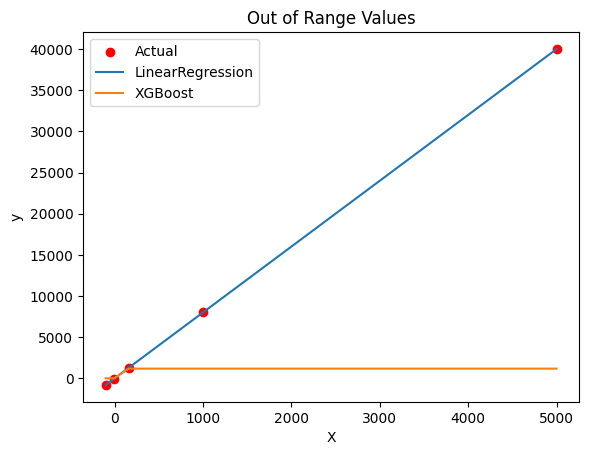

In [84]:
# XGBoost Predictions have an upper bound and lower bound
# Linear Regression Extrapolates

# Create scatter plot for actual values
# x-axis: input values from df_tmp.x
# y-axis: true values from df_tmp.y
# red color dots represent actual data points
plt.scatter(df_tmp.x,df_tmp.y,label='Actual',color='r')

# Plot Linear Regression predictions
# Creates a line connecting all predictions from linear model
# Shows how linear regression extends infinitely in both directions
plt.plot(df_tmp.x,df_tmp.linear,label='LinearRegression')

# Plot XGBoost predictions
# Creates a line connecting all predictions from XGBoost model
# Shows how XGBoost tends to plateau at the boundaries
plt.plot(df_tmp.x,df_tmp.xgboost,label='XGBoost')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Out of Range Values')
plt.show()

In [85]:
# X is inside range of training samples
# Create array of X values that are within the typical training range
# Values from 0 to 125 represent "normal" input values the models were trained on
X = np.array([0,1,3,5,7,9,11,15,18,125])

# Generate true y-values using the straight line function
# This creates target values following a linear relationship: y = mx + b
y = straight_line(X)

df_tmp = pd.DataFrame({'x':X,'y':y})

# Generate predictions using XGBoost model
# Since X is within training range, XGBoost should perform well
df_tmp['xgboost']=regressor.predict(df_tmp[['x']])

# Generate predictions using Linear Regression model
# Linear Regression should also perform well within this range
df_tmp['linear']=lin_regressor.predict(df_tmp[['x']])

In [86]:
df_tmp

,x,y,xgboost,linear
0,0,17,21.845406,17.683965
1,1,25,21.845406,25.681738
2,3,41,38.515892,41.677282
3,5,57,38.515892,57.672827
4,7,73,55.935287,73.668371
5,9,89,85.616440,89.663916
6,11,105,85.162651,105.659460
7,15,137,129.964706,137.650549
8,18,161,171.554184,161.643866
9,125,1017,990.715088,1017.405499


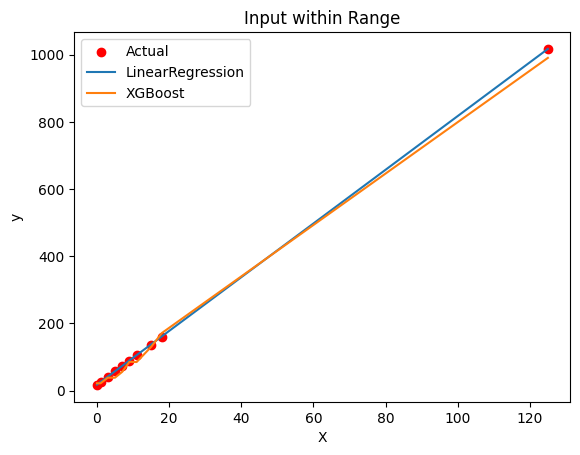

In [87]:
# XGBoost Predictions have an upper bound and lower bound
# Linear Regression Extrapolates

# Create scatter plot of actual values
# Red dots represent the true data points from the straight line function
plt.scatter(df_tmp.x,df_tmp.y,label='Actual',color='r')

# Plot Linear Regression predictions
# Shows how linear regression fits within the training range
plt.plot(df_tmp.x,df_tmp.linear,label='LinearRegression')

# Plot XGBoost predictions
# Shows how XGBoost fits within the training range
plt.plot(df_tmp.x,df_tmp.xgboost,label='XGBoost')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Input within Range')
plt.show()

In [ ]:
# Key Observations from this plot:

# Model Agreement:

# Both models (XGBoost and Linear Regression) should show similar predictions
# Lines should closely follow the actual data points (red dots)
# Less divergence between models compared to out-of-range predictions
# Expected Pattern:

# All three elements (actual, XGBoost, Linear Regression) should align well
# Predictions should follow the straight line pattern
# Minimal deviation from the true values
# Visual Differences from Out-of-Range Plot:

# More consistent predictions across both models
# Better fit to actual data
# No plateau effect from XGBoost (as seen in extrapolation)
# Linear Regression maintains its natural behavior
# What to Look For:

# How closely both models follow the actual red dots
# Any small differences between XGBoost and Linear Regression
# Overall prediction accuracy within the training range
# Interpretation:

# This plot demonstrates model reliability within training bounds
# Shows how well both models learned the underlying relationship
# Validates that both models are working as intended for normal inputs
# This visualization is useful for:

# Confirming model performance within training range
# Comparing prediction accuracy between models
# Demonstrating that both models can effectively learn linear relationships
# Showing how models behave when making interpolations rather than extrapolations
# The key takeaway is that both models should perform similarly and accurately within their training range, unlike their divergent behavior when extrapolating beyond it.